### Homework 3.6 - Voice Changer

We will try to make a simple voice changer by manipulating the frequency domain.

In this problem, you will have to make a short vocal record of about 10-15 seconds (no noise). Play around with the frequency domain to change the pitch of the audio and then invert it back to time domain in order to test the new voice. Make at least 2 new different voices.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq, irfft, fftshift

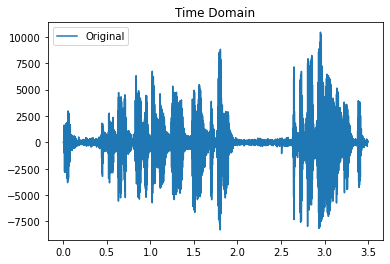

In [217]:
freq, y = wavfile.read('Record.wav')
dt = 1 / int(freq * 2)
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

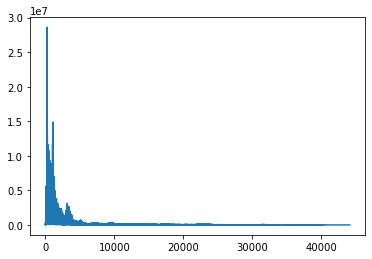

In [218]:
n  = len(t)
yf = rfft(y)
xf = rfftfreq(n, dt)

shifted_yf = np.roll(yf, 2)


#plt.plot(xf, abs(yf), label='Freq')
plt.plot(xf, abs(yf), label='Freq')

In [229]:
shift = 3

temp = np.zeros(len(yf))
if shift >= 0:
    temp[shift:len(yf)] = yf[0:(len(yf)-shift)] #shift to the right if positive 
    temp[0:shift] = yf[(len(yf)-shift):len(yf)] 
else:
    temp[0:(len(yf)+shift)] = temp[-shift:len(yf)] #shift to the left if negative 
    temp[(len(yf)+shift):len(yf)] = yf[0:-shift]
    
new_yf = np.array(temp)


#this does the same thing as np.roll(y, 3)

<ipython-input-229-c31a107db9a1>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[shift:len(yf)] = yf[0:(len(yf)-shift)]
<ipython-input-229-c31a107db9a1>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[0:shift] = yf[(len(yf)-shift):len(yf)]


In [233]:
wavfile.write('pitch_shifted.wav', freq, np.array(shifted_y, dtype=np.int16)) #shifted with code above 

In [205]:
wavfile.write('pitch_shifted2.wav', freq*2, np.array(y, dtype=np.int16)) #multiplies freq this will effect both frequency and duration 

# What I did 

I did 2 approaches, but neither one of them looks correct (lol). So first one I shifted the yf or y after fft so high frequency turns low and low turns high. So the sounds will be like talking in to a glass. Second one I simply multiply the freq before writing in wav this effects both frequency and duration of wav file. 